In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.datasets import load_iris
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

## Charger le dataset IRIS

In [10]:
df = load_iris()
df = pd.DataFrame(data= np.c_[df['data'], df['target']], columns= df['feature_names'] + ['target'])
x = df.drop('target', axis=1)
y = df['target']

## Modifier le Y pour le transormer en vecteur de 0 et 1

In [24]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Normalisation des donnée

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split des données

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

## Créer un modèle de classification

In [32]:
model = Sequential([
	Dense(25, activation='relu', input_shape=(4,)),
	Dense(25, activation='relu'),
	Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=15)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3751 - loss: 0.7086 - val_accuracy: 0.4333 - val_loss: 0.6835
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 0.6771 - val_accuracy: 0.5333 - val_loss: 0.6569
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.6499 - val_accuracy: 0.8000 - val_loss: 0.6327
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7539 - loss: 0.6262 - val_accuracy: 0.9000 - val_loss: 0.6102
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7531 - loss: 0.6090 - val_accuracy: 0.9000 - val_loss: 0.5887
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.5798 - val_accuracy: 0.9000 - val_loss: 0.5639
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.5487 - val_accuracy: 0.9000 - val_loss: 0.5356
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.5251 - val_accuracy: 0.9000 - val_loss: 0.5054
Epoch 9/

In [36]:
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.38812098, 0.4389409 , 0.44283196],
       [0.7327176 , 0.12348601, 0.2873673 ],
       [0.22274971, 0.2771297 , 0.5168827 ],
       [0.4014274 , 0.4356177 , 0.48190367],
       [0.3306606 , 0.4010159 , 0.46567976],
       [0.67576575, 0.21994717, 0.29392084],
       [0.44255063, 0.50132674, 0.38612986],
       [0.29526028, 0.3091168 , 0.5530701 ],
       [0.37529564, 0.5381824 , 0.3393164 ],
       [0.42166293, 0.5292334 , 0.38494122],
       [0.30860624, 0.3033283 , 0.55786437],
       [0.65784603, 0.2595252 , 0.23856093],
       [0.7100585 , 0.17848872, 0.29757798],
       [0.6674799 , 0.24715045, 0.24502273],
       [0.747265  , 0.1116432 , 0.21125525],
       [0.31733975, 0.32140547, 0.52756476],
       [0.31141874, 0.30577922, 0.5851383 ],
       [0.41289642, 0.54856694, 0.34703153],
       [0.41506103, 0.4787378 , 0.4415795 ],
       [0.3541846 , 0.3392217 , 0.56597817],
       [0.6916672 , 0.21275659, 0.22085433],
       [0.37422708, 0.37773547, 0.5387505 ],
       [0.

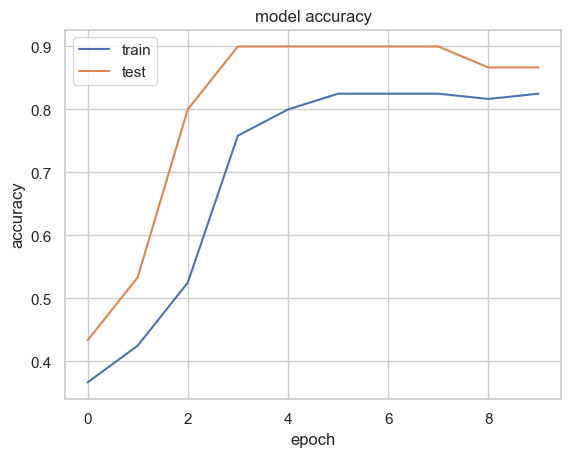

In [34]:
sns.set(style='whitegrid')
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

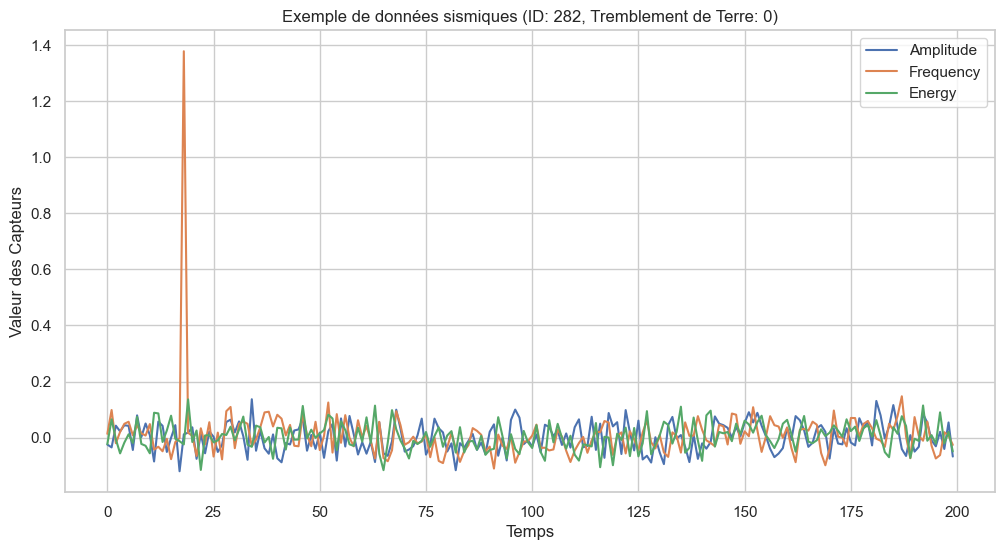

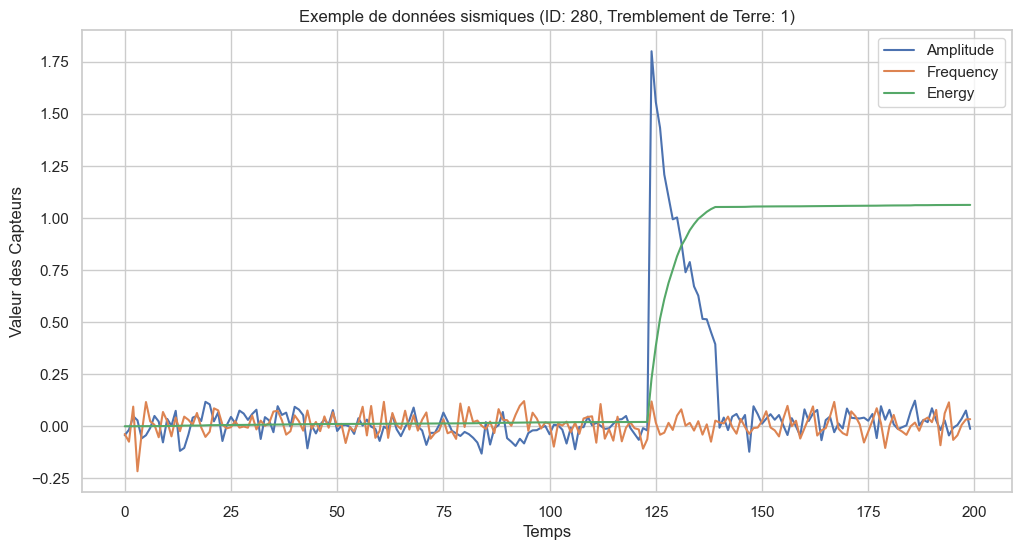

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Paramètres de la simulation
n_samples = 2000  # Nombre d'échantillons à générer
n_timesteps = 200  # Nombre de pas de temps par échantillon
n_features = 3  # Nombre de capteurs (caractéristiques)
noise_level = 0.05  # Niveau de bruit ajouté aux données
earthquake_chance = 0.3  # Probabilité qu'un tremblement de terre survienne dans un échantillon
feature_labels = ['Amplitude', 'Frequency', 'Energy']  # Caractéristiques sismiques simulées

def generate_synthetic_seismic_data(n_samples, n_timesteps, n_features, noise_level, earthquake_chance):
    data = []
    labels = []

    for i in range(n_samples):
        # Initialisation des données des capteurs
        sample = np.zeros((n_timesteps, n_features))

        # Générer du bruit complexe pour chaque capteur
        for feature in range(n_features):
            # Bruit gaussien de base
            sample[:, feature] = np.random.normal(0, noise_level, n_timesteps)
            # Ajout d'un bruit périodique pour complexifier
            sample[:, feature] += 0.1 * np.sin(np.linspace(0, 3 * np.pi, n_timesteps)) * (np.random.rand() - 0.5)
            # Ajout de pics de bruit impulsifs aléatoires
            if np.random.rand() < 0.05:
                impulse_position = np.random.randint(0, n_timesteps)
                impulse_magnitude = np.random.uniform(0.5, 1.5)
                sample[impulse_position, feature] += impulse_magnitude

        # Décider s'il y a un ou plusieurs tremblements de terre dans cet échantillon
        if np.random.rand() < earthquake_chance:
            num_quakes = np.random.randint(1, 3)  # Jusqu'à 2 tremblements de terre par échantillon
            for _ in range(num_quakes):
                quake_start = np.random.randint(20, n_timesteps - 20)
                quake_duration = np.random.randint(10, 30)

                # Caractéristique 1: Amplitude (un pic soudain et élevé)
                magnitude = np.random.uniform(1, 4)  # Réduire les magnitudes pour certains tremblements de terre
                actual_duration = min(quake_duration, n_timesteps - quake_start)
                sample[quake_start:quake_start + actual_duration, 0] += magnitude * np.exp(-0.1 * np.arange(actual_duration))

                # Caractéristique 2: Fréquence (augmentation de la fréquence des oscillations)
                frequency_modulation = np.sin(np.linspace(0, 15 * np.pi, actual_duration)) * 0.3
                sample[quake_start:quake_start + actual_duration, 1] += frequency_modulation * magnitude

                # Caractéristique 3: Énergie (intégrale de l'amplitude au carré) mais plus difficile à détecter
                energy = np.cumsum(sample[:, 0] ** 2)
                sample[:, 2] = (energy / np.max(energy)) * (1 + 0.1 * np.random.randn())  # Ajouter du bruit pour complexifier

            labels.append(1)  # 1 pour un tremblement de terre
        else:
            labels.append(0)  # 0 pour aucun tremblement de terre

        data.append(sample)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Générer les données
data, labels = generate_synthetic_seismic_data(n_samples, n_timesteps, n_features, noise_level, earthquake_chance)

# Convertir les données en DataFrame pour une meilleure visualisation
df_list = []
for i in range(n_features):
    df_temp = pd.DataFrame({
        'Time': np.tile(np.arange(n_timesteps), n_samples),
        'Value': data[:, :, i].flatten(),
        'Sample_ID': np.repeat(np.arange(n_samples), n_timesteps),
        'Feature': feature_labels[i],
        'Earthquake': np.repeat(labels, n_timesteps)
    })
    df_list.append(df_temp)
df = pd.concat(df_list, axis=0)

# Visualisation de quelques exemples de séries temporelles
example_ids = np.random.choice(np.arange(n_samples), 2, replace=False)
for example_id in example_ids:
    plt.figure(figsize=(12, 6))
    for i in range(n_features):
        plt.plot(df[(df['Sample_ID'] == example_id) & (df['Feature'] == feature_labels[i])]['Time'],
                 df[(df['Sample_ID'] == example_id) & (df['Feature'] == feature_labels[i])]['Value'], label=feature_labels[i])
    plt.title(f"Exemple de données sismiques (ID: {example_id}, Tremblement de Terre: {labels[example_id]})")
    plt.xlabel("Temps")
    plt.ylabel("Valeur des Capteurs")
    plt.legend()
    plt.show()

# Sauvegarder les données générées
df.to_csv('complex_synthetic_seismic_data.csv', index=False)
